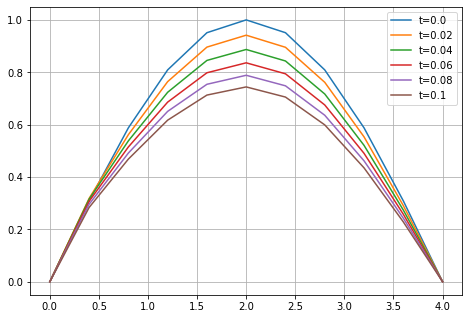

In [24]:
from numpy import pi, sin, exp
import numpy as np
np.set_printoptions(precision = 2, suppress = True)

n = 11
N = 10
m = 6
ax, bx = 0, 4
at, bt = 0, 0.1
h = (bx - ax) / N
tau = (bt - at) / (m - 1)
phi = lambda x: sin(pi * x / 4)
a = 16 / pi

rx = [ax + i * h for i in range(n)]
rt = [at + i * tau for i in range(m + 1)]

def explicit():
    u = np.zeros(shape = (n, m))
    u[:, 0] = np.array([phi(x) for x in rx])
    
    for j in range(m - 1):
        for i in range(1, n - 1):
            u[i,j+1] = a*tau*(u[i+1,j]-2*u[i,j]+u[i-1,j])/h**2 + u[i,j]

    return u

def implicit():
    u = np.zeros(shape = (n, m))
    u[:, 0] = np.array([phi(x) for x in rx])
    k = -a * tau / h ** 2
    A, B, C = k, (1 - 2 * k), k
    for j in range(1, m):
        u[:, j] = solve(A, B, C, u[:, j - 1])
    return u

def solve(A, B, C, F):
    alpha, beta = [0] * n, [0] * n
    alpha[1] = -C / B
    beta[1]  =  F[0] / B

    for k in range(1, n - 1):
        alpha[k + 1] = -C / (B + A * alpha[k]) 
        beta[k + 1]  = (F[k] - A * beta[k]) / (B + A * alpha[k])
        
    U = [0 for k in range(n)]
    for k in range(N - 1, 0, -1):
        U[k] = alpha[k + 1] * U[k + 1] + beta[k + 1]
    
    return U

f = lambda x, t: exp(-pi * t) * sin(pi * x / 4)
u = np.zeros(shape = (n, m))
for i in range(n):
    for j in range(m):
        u[i, j] = f(rx[i], rt[j])

from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
for i in range(m):
    #ax.plot(rx, u[:, i], label='t={}'.format(rt[i]))
    #ax.plot(rx, explicit()[:, i], label='t={}'.format(rt[i]))
    ax.plot(rx, implicit()[:, i], label='t={}'.format(rt[i]))
ax.legend()
plt.grid()
plt.show()